# Comprendre avec R

## l'arborescence

In [1]:
value <-  1
truc <- 'machin'


Pour afficher tous les objets

In [2]:
objects()

[1] "truc"  "value"

Pour effacer un objet

In [3]:
rm(value)
objects()

[1] "truc"

Pour le working directory:

In [4]:
folder <- getwd()
print(folder)

[1] "c:/Users/33771/Documents/stage 3A/basics"


In [5]:
setwd('./db')
getwd()
setwd('..')
getwd()


[1] "c:/Users/33771/Documents/stage 3A/basics/db"

[1] "c:/Users/33771/Documents/stage 3A/basics"

## Les listes, matrices et dataframes

### Vecteurs (listes d'un type donné)

In [6]:
x <- c(1, 3, 5, 7, 9)
y <- seq(1, 10, 2)
print(x)
print(y)

[1] 1 3 5 7 9
[1] 1 3 5 7 9


slicing

In [7]:
z <- y[-2]
z
slice <- x[c(TRUE,T,F,T,F)]
print(slice)
print(x >5 & x<9) #useful to slice with this
print(x<2 | x>8) #symbole du "or"

[1] 1 5 7 9

[1] 1 3 7
[1] FALSE FALSE FALSE  TRUE FALSE
[1]  TRUE FALSE FALSE FALSE  TRUE


about length

In [8]:
length(x)
#Attention x[i] est acceptable mais pas x[i,j]: x[c(i,j)] est la solution

[1] 5

### Les matrices

In [61]:
mat <- matrix(1:12, nrow=3, ncol=4) #by default, byrow = FALSE: par colonnes donc
print(mat)
mat_row <- matrix(1:12, nrow=3, ncol=4, byrow = TRUE)   #Par lignes maintenant
print(mat_row)
t(mat)

     [,1] [,2] [,3] [,4]
[1,]    1    4    7   10
[2,]    2    5    8   11
[3,]    3    6    9   12
     [,1] [,2] [,3] [,4]
[1,]    1    2    3    4
[2,]    5    6    7    8
[3,]    9   10   11   12


1,2,3
4,5,6
7,8,9
10,11,12


#### slicing matriciel

In [10]:
library(glue) # pour le format de la chaîne de caractères
print(dim(mat))
print(length(mat))
value <- mat[2, 3]
print(glue("la valeur est {value}"))
slices = mat[1:2, 2:4]
print('slices:')
slices

[1] 3 4
[1] 12
la valeur est 8
[1] "slices:"


4,7,10
5,8,11


collapser ou non les colonnes

In [18]:
print('cols')
cols = mat[, 2:3]  
cols
print('one_col')
one_col =  mat[, 2]
one_col
dim(one_col)
one_big_col = mat[,2, drop = FALSE]
one_big_col
dim(one_big_col)

[1] "cols"


4,7
5,8
6,9


[1] "one_col"


[1] 4 5 6

NULL

4
5
6


[1] 3 1

[1] 2

lien avec les listes

In [12]:
list = as.list(one_big_col)
list
dim(list)
big_list = c(mat)
big_list

[[1]]
[1] 4

[[2]]
[1] 5

[[3]]
[1] 6

NULL

[1]  1  2  3  4  5  6  7  8  9 10 11 12

### Dataframes

In [13]:
library(readxl)
df = read_excel('../data/Descriptif_patients.xlsx')
head(df)

classe_name,patient_num,Gender,Age_at_disease,Date_of_MRI,Date_of_surgery,Alpha_foetoprotein,Local_relapse,Date_of_local_relapse,Distant_relapse,Date_of_distant_relapse,Death,Date_of_death,Date_of_lost_of_FU
<chr>,<dbl>,<chr>,<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dttm>,<dbl>,<dttm>,<dbl>,<dttm>,<dttm>
CCK,10,M,62,2015-06-30,2015-07-01,NA,0,NA,0,NA,1,2015-11-11,NA
CCK,11,F,57,2015-05-22,2015-08-12,6.1,0,NA,0,NA,0,NA,2017-06-08
CCK,12,M,58,2016-02-15,2016-04-13,1.4,NA,NA,1,2016-06-16,1,2021-03-30,NA
CCK,13,M,65,2016-06-07,2016-08-05,0.0,0,NA,1,2017-06-19,1,2022-04-25,NA
CCK,14,M,64,2016-10-26,2017-03-16,0.0,0,NA,0,NA,1,2017-03-27,NA
CCK,15,M,59,2017-01-31,2017-03-30,6.0,0,NA,0,NA,0,NA,2023-06-28


In [14]:
summary(df)

 classe_name         patient_num        Gender          Age_at_disease 
 Length:147         Min.   :  1.00   Length:147         Min.   :24.00  
 Class :character   1st Qu.: 15.50   Class :character   1st Qu.:55.24  
 Mode  :character   Median : 33.00   Mode  :character   Median :61.43  
                    Mean   : 61.22                      Mean   :62.23  
                    3rd Qu.: 84.50                      3rd Qu.:71.18  
                    Max.   :222.00                      Max.   :93.00  
                                                        NA's   :5      
  Date_of_MRI                     Date_of_surgery                 
 Min.   :2008-11-24 00:00:00.00   Min.   :1905-07-02 00:00:00.00  
 1st Qu.:2012-12-26 00:00:00.00   1st Qu.:2013-10-23 06:00:00.00  
 Median :2015-05-12 00:00:00.00   Median :2015-08-09 12:00:00.00  
 Mean   :2015-05-29 12:44:41.38   Mean   :2013-06-10 18:43:38.18  
 3rd Qu.:2017-09-20 00:00:00.00   3rd Qu.:2017-12-25 06:00:00.00  
 Max.   :2021-01-14 00

In [29]:
df$patient_num  #to-list
df[[2]] #to_list
head(df[["patient_num"]]) #to list
dim(df)
head(df[c("patient_num","Gender")]) #to_df
head(df["patient_num"]) #to_df


[1]  10  11  12  13  14  15  16  17  18  19   1  20  21  23  24  25   2   3
 [19]   4   5   6   8   9 100 101 104 107 108 110 111 112 116 119  11 121  13
 [37]  18  19   1 203 204 205 206 207 209  20 210 211 212 213 214 215 216 217
 [55] 218  21 220 221 222  22  24  25  29  30  31  32  34  38  39   3  42  43
 [73]  45  49   4  50  51  52  55  57  58  59  61  62  63  64  65  68  69  70
 [91]  71  73  74  75  77  79   7  81  82  84  85  87   8  90  92  93  95  96
[109]  99   9  10  11  12  13  14  15  16  17  18  19   1  20  21  22  24  25
[127]  26  27  28  29   2  30  31  32  33  34  35  36  37  38   3   4   5   6
[145]   7   8   9

[1]  10  11  12  13  14  15  16  17  18  19   1  20  21  23  24  25   2   3
 [19]   4   5   6   8   9 100 101 104 107 108 110 111 112 116 119  11 121  13
 [37]  18  19   1 203 204 205 206 207 209  20 210 211 212 213 214 215 216 217
 [55] 218  21 220 221 222  22  24  25  29  30  31  32  34  38  39   3  42  43
 [73]  45  49   4  50  51  52  55  57  58  59  61  62  63  64  65  68  69  70
 [91]  71  73  74  75  77  79   7  81  82  84  85  87   8  90  92  93  95  96
[109]  99   9  10  11  12  13  14  15  16  17  18  19   1  20  21  22  24  25
[127]  26  27  28  29   2  30  31  32  33  34  35  36  37  38   3   4   5   6
[145]   7   8   9

[1] 10 11 12 13 14 15

[1] 147  14

patient_num,Gender
<dbl>,<chr>
10,M
11,F
12,M
13,M
14,M
15,M


patient_num
<dbl>
10
11
12
13
14
15


In [40]:
matrix <- as.matrix(df['patient_num'])
colnames(matrix) <- NULL #sinon ça garde le nom: pas bien méchant
head(matrix)
dim(matrix)

10
11
12
13
14
15


[1] 147   1

[1] 19

## Basic plots

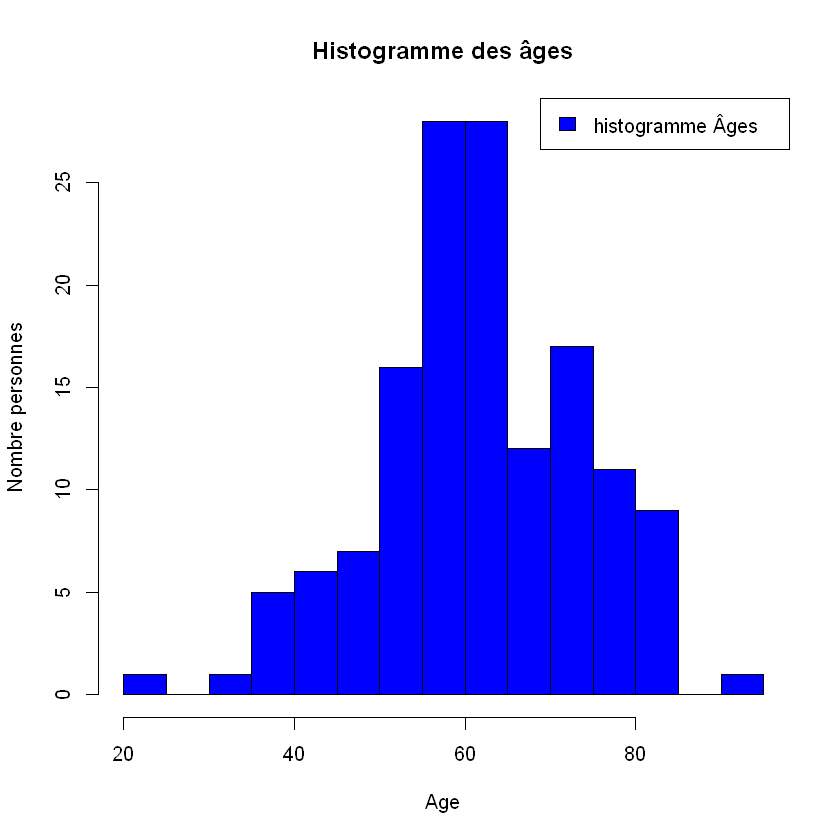

In [46]:
hist(df$Age_at_disease, col = 'blue', breaks = 10, main = 'Histogramme des âges', xlab = 'Age', ylab = 'Nombre personnes')
legend('topright', legend = 'histogramme Âges', fill = 'blue')

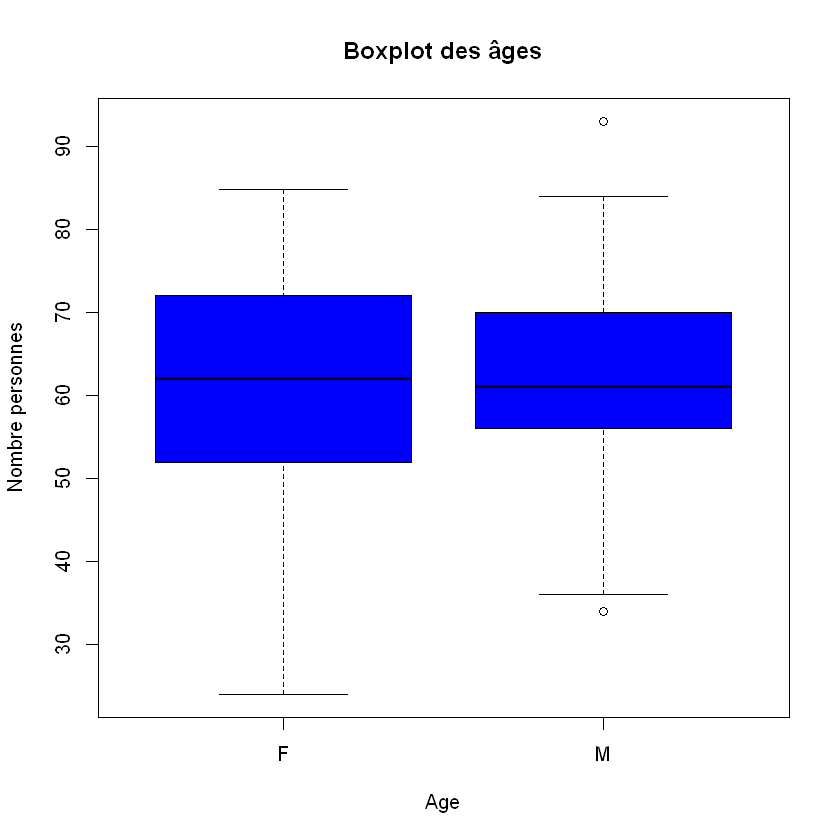

In [52]:
boxplot(Age_at_disease ~ Gender,data = df, col = 'blue', main = 'Boxplot des âges', xlab = 'Age', ylab = 'Nombre personnes')

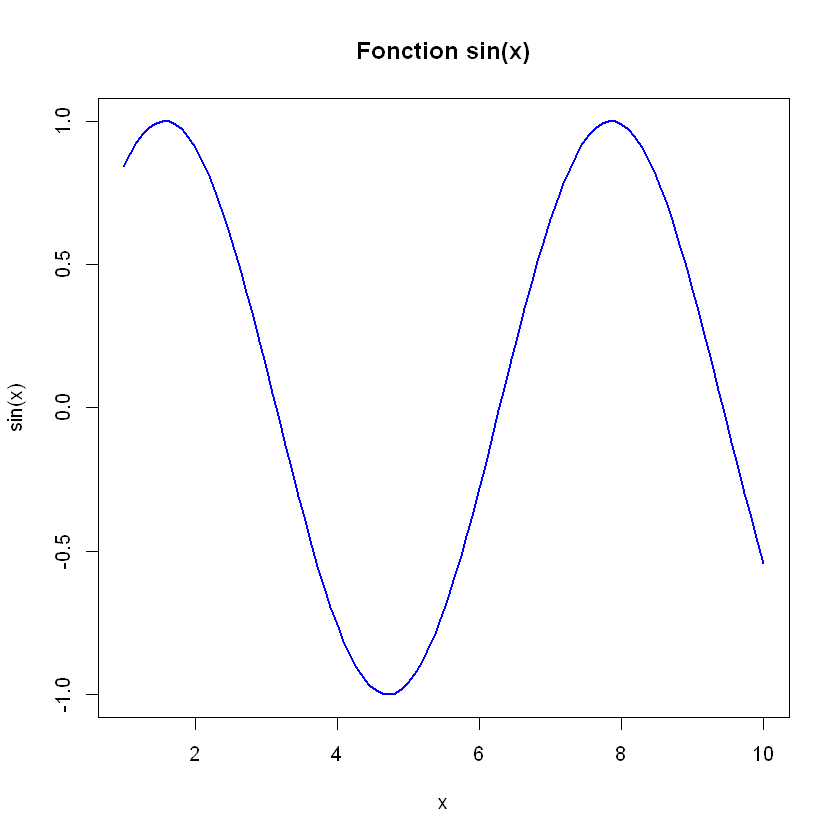

In [54]:
x = seq(1,10,length.out = 100)
y = sin(x)
plot(x, y, type = 'l', col = 'blue', lwd = 2, main = 'Fonction sin(x)', xlab = 'x', ylab = 'sin(x)')

## Boucles

Boucle for

In [59]:
for (i in mat){
  print(i)
}
mat

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12


1,4,7,10
2,5,8,11
3,6,9,12


Boucle while

In [63]:
i = 0
while (i<5){
    print(i)
    i = i+1
}

[1] 0
[1] 1
[1] 2
[1] 3
[1] 4


Avec du calcul parallèle (et c'est pas fou!)

In [79]:
big_mat = matrix(1:100000, nrow = 1000, ncol = 100)
# Charger le package doParallel
library(doParallel)
library(foreach)
# Enregistrer un backend parallèle avec 4 cœurs
registerDoParallel(cores = parallel::detectCores())

result <- foreach(i=1:nrow(big_mat), .combine=rbind) %dopar% {
  big_mat[i,] / mean(big_mat[i,])
}

# Arrêter le backend parallèle
stopImplicitCluster()
print(head(result))

                 [,1]       [,2]       [,3]       [,4]       [,5]      [,6]
result.1 2.020161e-05 0.02022181 0.04042343 0.06062504 0.08082665 0.1010283
result.2 4.040241e-05 0.02024161 0.04044281 0.06064401 0.08084522 0.1010464
result.3 6.060239e-05 0.02026140 0.04046219 0.06066299 0.08086379 0.1010646
result.4 8.080155e-05 0.02028119 0.04048158 0.06068197 0.08088235 0.1010827
result.5 1.009999e-04 0.02030098 0.04050096 0.06070094 0.08090092 0.1011009
result.6 1.211974e-04 0.02032077 0.04052034 0.06071991 0.08091948 0.1011191
              [,7]      [,8]      [,9]     [,10]     [,11]     [,12]     [,13]
result.1 0.1212299 0.1414315 0.1616331 0.1818347 0.2020363 0.2222379 0.2424395
result.2 0.1212476 0.1414488 0.1616500 0.1818512 0.2020524 0.2222536 0.2424549
result.3 0.1212654 0.1414662 0.1616670 0.1818678 0.2020686 0.2222694 0.2424702
result.4 0.1212831 0.1414835 0.1616839 0.1818843 0.2020847 0.2222851 0.2424855
result.5 0.1213009 0.1415009 0.1617008 0.1819008 0.2021008 0.2223008 0.24

## Fonctions

In [95]:
my_fun = function(x){
  return(x^2)
}
my_fun(2)
li = c(0,5,6,8)
sapply(li,my_fun)[1:5]
head(apply(df['Age_at_disease'], c(1,2),my_fun))  #c(1,2) pour bosser sur les lignes et colonnes
apply(mat,c(1,2),my_fun)

[1] 4

[1]  0 25 36 64 NA

Age_at_disease
3844
3249
3364
4225
4096
3481


1,16,49,100
4,25,64,121
9,36,81,144


In [23]:
df = data.frame(a = c(1,2,3,4,5), b = c(1,1,1,2,2))
print(as.data.frame(table(df$b)))

  Var1 Freq
1    1    3
2    2    2


In [6]:
library(glue)
library(data.table)
li <- list(a = c(1,2,3), b = c(2,3,4))
df <- as.data.frame(li)
df_long <- melt(df)
print(df_long)

Warning message:
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is superseded and is no longer actively developed, and this redirection is now deprecated. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace, i.e. reshape2::melt(df). In the next version, this warning will become an error."
No id variables; using all as measure variables



  variable value
1        a     1
2        a     2
3        a     3
4        b     2
5        b     3
6        b     4


In [7]:
melt_mine <- function(df){
    new_df  = as.data.frame(matrix(nrow = 0, ncol = 2))
    colnames(new_df) <- c("variable", "value")
    for (name_col in colnames(df)){
        local_df <- data.frame(variable = name_col, value = df[[name_col]])
        new_df <- rbind(new_df, local_df)
    }
    return(new_df)
}

print(melt_mine(df))

  variable value
1        a     1
2        a     2
3        a     3
4        b     2
5        b     3
6        b     4


In [10]:
mat_1 = matrix(1:12, nrow = 3, ncol = 4)
mat_2 = matrix(1:12, nrow = 3, ncol = 4)
li_mat = list(mat_1, mat_2)
print(Reduce("+", li_mat))
mat <- matrix(c(1,2,5,2), nrow=2, ncol=2, byrow = TRUE)
mat_percentages <- apply(mat, 1, function(x){x / sum(x)})
print(mat_percentages)
li_mat <- list()
li_mat <- append(li_mat,list(mat_1))
print(li_mat)

     [,1] [,2] [,3] [,4]
[1,]    2    8   14   20
[2,]    4   10   16   22
[3,]    6   12   18   24
          [,1]      [,2]
[1,] 0.3333333 0.7142857
[2,] 0.6666667 0.2857143
[[1]]
     [,1] [,2] [,3] [,4]
[1,]    1    4    7   10
[2,]    2    5    8   11
[3,]    3    6    9   12



Les levels et leur ordre

In [15]:
# Création d'un vecteur exemple
classe_name <- c("B", "A", "C", "B", "A")

classe_name_factor <- factor(classe_name)

print(levels(classe_name_factor))

# Conversion en facteur avec un ordre spécifique des niveaux
classe_name_factor <- factor(classe_name,levels = c("B", "A", "C"))

# Vérification de l'ordre des niveaux
print(levels(classe_name_factor))

[1] "A" "B" "C"
[1] "B" "A" "C"


In [1]:
col = c(1,2,3)
init = rep(0,3)
log <- col >1.5
print(log)
print(init + log)

[1] FALSE  TRUE  TRUE
[1] 0 1 1


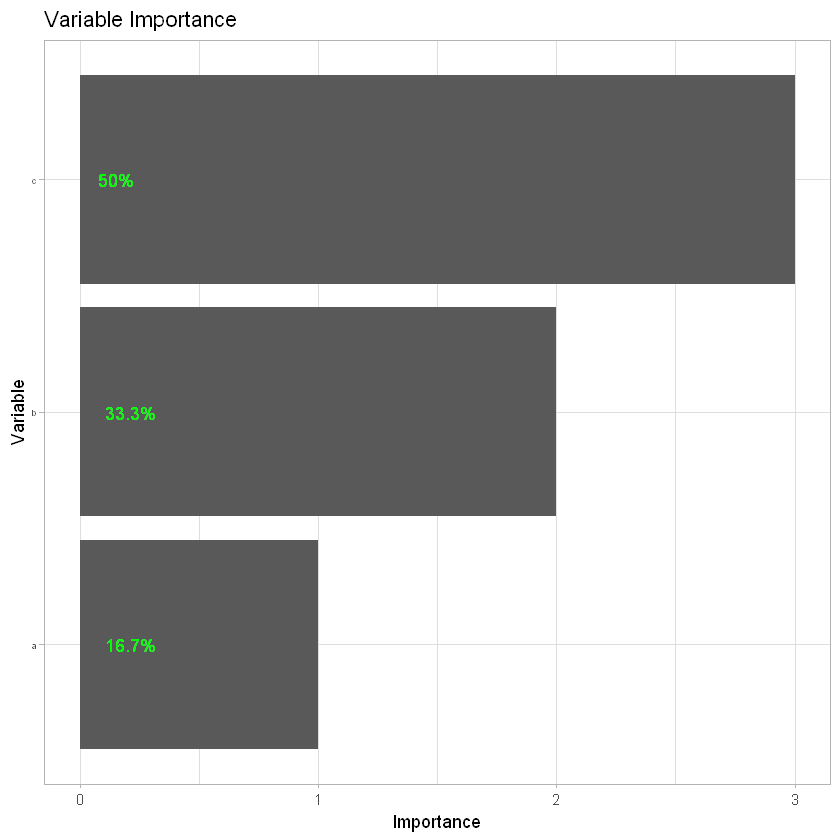

In [26]:
library(ggplot2)
imp_average <- data.frame(Variable = c("a","b","c"), Overall = c(1,2,3))
imp_average$Percentage <- (imp_average$Overall / sum(imp_average$Overall)) * 100
image <- ggplot2::ggplot(imp_average, aes(x = reorder(Variable, Overall), y = Overall)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(round(Percentage, 1), "%"), y = 0), hjust = -0.5, color = "green") + # Ajout des pourcentages
  coord_flip() +
  theme_light() +
  xlab("Variable") +
  ylab("Importance") +
  ggtitle("Variable Importance") +
  theme(axis.text.y = element_text(size = 5)) # Adjust the size as needed
image

In [25]:
df <- data.frame(a = c(1,1,2), b = c(1,2,3), c= c(1,4,3))
print(aggregate(df, b ~ a, mean))
d <- "c"
print(subset(df, df[[d]] >2 ))

  a   b
1 1 1.5
2 2 3.0
  a b c
2 1 2 4
3 2 3 3


In [27]:
li = lapply(as.list(2:4), function(i) {return(i^2)})
print(names(li))
print(as.list(2:4))
print("JU")
print(li)

NULL
[[1]]
[1] 2

[[2]]
[1] 3

[[3]]
[1] 4

[1] "JU"
[[1]]
[1] 4

[[2]]
[1] 9

[[3]]
[1] 16



In [30]:
li <- list(mat_1 = matrix(1:12, nrow = 3, ncol = 4), mat_2 = matrix(1:12, nrow = 3, ncol = 4), mat_3 = matrix(1:12, nrow = 3, ncol = 4))
mat_tot <- do.call(cbind, li)
print(mat_tot)
print(c(t(li$mat_1)))

     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12]
[1,]    1    4    7   10    1    4    7   10    1     4     7    10
[2,]    2    5    8   11    2    5    8   11    2     5     8    11
[3,]    3    6    9   12    3    6    9   12    3     6     9    12
 [1]  1  4  7 10  2  5  8 11  3  6  9 12


In [56]:
paste("oui", c(1,2))

[1] "oui 1" "oui 2"

In [58]:
n <- 5 # Nombre de vecteurs vides souhaités
liste_vecteurs_vides <- replicate(n, vector(), simplify = FALSE)
liste_vecteurs_vides[[1]] <- c(liste_vecteurs_vides[[1]],1)
print(liste_vecteurs_vides)


[[1]]
[1] 1

[[2]]
logical(0)

[[3]]
logical(0)

[[4]]
logical(0)

[[5]]
logical(0)



In [3]:
li_df <- list(a = c(1,2,3), b = c(2,3,4))
print(as.data.frame(li_df))
print(expand.grid(li_df))

  a b
1 1 2
2 2 2
3 3 2
4 1 3
5 2 3
6 3 3


In [11]:
# Créer une fonction factice avec des print et un argument
my_function <- function(x) {
  print(paste("Ce message est bruyant avec l'argument:", x))
  Sys.sleep(2) # Simule du travail
  print("Encore un autre message bruyant")
  return(paste("Travail terminé avec l'argument:", x))
}

# Rediriger les sorties
silent_run <- function(func, ...) {
  # Créer un fichier temporaire pour capturer les sorties
  temp_file <- tempfile()
  
  # Ouvrir une connexion au fichier temporaire
  temp_conn <- file(temp_file, open = "wt")
  
  # Rediriger les messages de sortie standard vers la connexion au fichier temporaire
  sink(temp_conn)
  
  # Rediriger les messages d'avertissement vers la connexion au fichier temporaire
  sink(temp_conn, type = "message")
  
  # Exécuter la fonction en mode silencieux avec les arguments supplémentaires
  result <- func(...)
  
  # Réinitialiser les sorties à leurs destinations d'origine
  sink()
  sink(type = "message")
  
  # Fermer la connexion au fichier temporaire
  close(temp_conn)
  
  # Supprimer le fichier temporaire
  unlink(temp_file)
  
  return(result)
}

# Utilisation de la fonction silent_run avec un argument pour my_function
result <- silent_run(my_function, x = 42)
print(result)  # Affiche "Travail terminé avec l'argument: 42"



[1] "Travail terminé avec l'argument: 42"
